In [22]:
import os
import seaborn as sns
import numpy as np
import pandas as pd
import librosa.display
import glob
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.head()

ID         Class
0   0         siren
1   1  street_music
2   2      drilling
3   3         siren
4   4      dog_bark

In [5]:
test.head()

ID
0   5
1   7
2   8
3   9
4  13

### Basic Exploratory Analysis

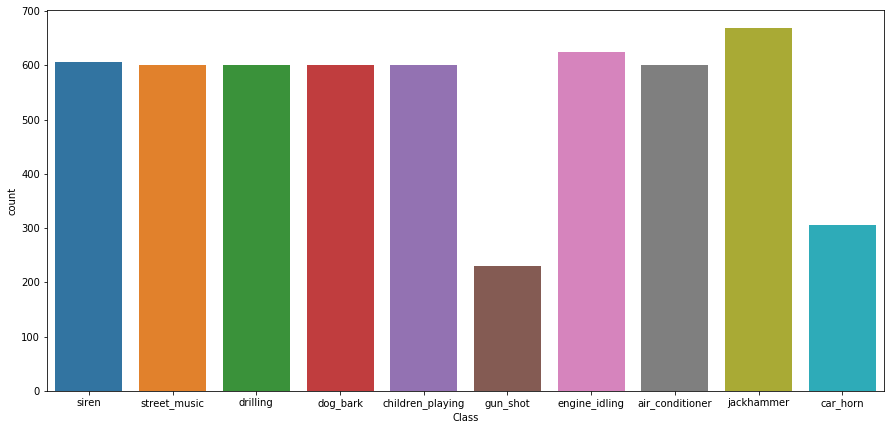

In [6]:
# Class distribution
plt.figure(figsize=(15,7))
sns.countplot(x="Class", data=train)
plt.show()

In [7]:
ipd.Audio('Train/0.wav')

In [8]:
data, sampling_rate = librosa.load('Train/0.wav')

In [9]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [11]:
temp = []
data_dir=''
for name in train.ID:
    file_name = os.path.join(os.path.abspath(data_dir), 'Train', str(name) + '.wav')
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    # we extract mfcc feature from data
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
    temp.append(mfccs)

In [15]:
train_X = np.stack(temp)

In [18]:
train_X

array([[-8.21235886e+01,  1.39505951e+02, -4.24308472e+01, ...,
        -5.02371252e-01, -2.60428572e+00, -1.05346370e+00],
       [-1.57440014e+01,  1.24119957e+02, -2.94288807e+01, ...,
         8.23705614e-01,  1.71932220e+00, -3.31463546e-01],
       [-1.23393654e+02,  1.51819439e+01, -5.00933380e+01, ...,
         1.57439053e+00, -3.99674225e+00,  3.24575019e+00],
       ...,
       [-3.20817383e+02,  5.83005714e+01, -6.86950397e+00, ...,
         9.27267194e-01, -4.82822418e+00,  2.27338696e+00],
       [-2.77031799e+02,  1.41145706e+02, -3.63291206e+01, ...,
        -8.68412614e-01,  1.51832962e+00,  1.36296976e+00],
       [-2.90996765e+02,  2.33351517e+02, -4.67234850e+00, ...,
         2.80950904e-01, -3.52302939e-01, -1.58163998e-02]], dtype=float32)

In [19]:
temp = []
data_dir=''
for name in test.ID:
    file_name = os.path.join(os.path.abspath(data_dir), 'Test', str(name) + '.wav')
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    # we extract mfcc feature from data
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
    temp.append(mfccs)

In [20]:
test_X = np.stack(temp)

In [23]:
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = to_categorical(train_y)

## CNN

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import np_utils
from keras.optimizers import RMSprop
from keras.utils import np_utils

In [27]:
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [34]:
# reshape to be [samples][pixels][width][height]
train_X = train_X.reshape(train_X.shape[0], 8, 5,1).astype('float32')
test_X = test_X.reshape(test_X.shape[0], 8, 5,1).astype('float32')

In [37]:
# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (8,5,1)))
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [38]:
# build the model
model = larger_model()
# Fit the model
model.fit(train_X, train_y, epochs=20)

W0912 16:25:08.003356  2712 deprecation.py:323] From D:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
5435/5435 [==============================] - 4s 693us/step - loss: 1.7465 - acc: 0.3884
Epoch 2/20
5435/5435 [==============================] - 3s 536us/step - loss: 1.0396 - acc: 0.6574 0s - loss: 1.0465 - acc: 0.6
Epoch 3/20
5435/5435 [==============================] - 3s 543us/step - loss: 0.7646 - acc: 0.7492
Epoch 4/20
5435/5435 [==============================] - 3s 543us/step - loss: 0.6052 - acc: 0.8009
Epoch 5/20
5435/5435 [==============================] - 3s 546us/step - loss: 0.5154 - acc: 0.8296
Epoch 6/20
5435/5435 [==============================] - 3s 544us/step - loss: 0.4458 - acc: 0.8539
Epoch 7/20
5435/5435 [==============================] - 3s 574us/step - loss: 0.3855 - acc: 0.8767
Epoch 8/20
5435/5435 [==============================] - 3s 565us/step - loss: 0.3568 - acc: 0.8795
Epoch 9/20
5435/5435 [==============================] - 3s 550us/step - loss: 0.3140 - acc: 0.8938
Epoch 10/20
5435/5435 [==============================] - 3s 597us/step - loss: 0

In [39]:
y_pred=model.predict_classes(test_X)
y_pred

array([4, 3, 4, ..., 7, 5, 8], dtype=int64)

In [40]:
y_pred=pd.DataFrame(lb.inverse_transform(y_pred))
y_pred

0
0             drilling
1             dog_bark
2             drilling
3             dog_bark
4             gun_shot
5             drilling
6           jackhammer
7     children_playing
8                siren
9                siren
10     air_conditioner
11            car_horn
12            dog_bark
13       engine_idling
14        street_music
15       engine_idling
16            dog_bark
17            drilling
18          jackhammer
19        street_music
20       engine_idling
21    children_playing
22               siren
23            drilling
24            drilling
25        street_music
26       engine_idling
27     air_conditioner
28    children_playing
29        street_music
...                ...
3267          drilling
3268      street_music
3269        jackhammer
3270          dog_bark
3271             siren
3272          drilling
3273        jackhammer
3274          dog_bark
3275      street_music
3276      street_music
3277        jackhammer
3278        jackhammer
3279          dog_bark
3280        jackhammer
3281   air_conditioner
3282      street_music
3283      street_music
3284     engine_idling
3285  children_playing
3286          dog_bark
3287   air_conditioner
3288             siren
3289      street_music
3290     engine_idling
3291          drilling
3292          drilling
3293  children_playing
3294        jackhammer
3295     engine_idling
3296             siren

[3297 rows x 1 columns]

In [41]:
t=pd.read_csv('test.csv')
y_pred['Class']=pd.DataFrame(y_pred)
output=pd.concat([y_pred,t['ID']],axis=1)
output.drop(0,axis=1,inplace=True)
output.to_csv('CNN_output.csv',index=False)